In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import  generate_data, lstm_model

DATA = pd.read_table(open("fulldata.csv",encoding='utf-8'),header=None,low_memory=False,sep=';')

In [2]:
X=DATA[[1,5,6,7]]

In [3]:
e=X[1].value_counts()

In [4]:
good_list=["58305A05","58209072","582AFE2A","58041E1A","585FBFAB","582D78D2","581F9DFC","5848D0C2","582C911D","583C1DAE","5843CDCC","582169AE","583B0D1A","58437314","585D8BD0","5823DAB9","585D605C","583BC56B","5838039E","585EEE93","5802D3E0","5818E91D","580828AA","58334D62","580F2A7C","5848FFF1","582008D9","5819708F","58120C5C","58199037"]
#reprezentatív mintát véve

In [5]:
if True:
    user="58305A05"
    sel=X.loc[X[1] == user]
    train_x=np.array(sel.as_matrix(columns=[5])[:,0])
    train_y=np.array(sel.as_matrix(columns=[6,7]))
    train_x=train_x.astype(float)
    train_y=train_y.astype(float)
    valid_x=train_x[int(len(train_x)*9/10):len(train_x)]
    train_x=train_x[0:int(len(train_x)*9/10)]
    valid_y=train_y[int(len(train_y)*9/10):len(train_y)]
    train_y=train_y[0:int(len(train_y)*9/10)]

In [6]:
LOG_DIR = './ops_logs/sin'
TIMESTEPS = 10

RNN_LAYERS = [{'num_units': 5}]
DENSE_LAYERS = None
TRAINING_STEPS = 20000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 100

In [7]:
regressor = learn.Estimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS),
                            model_dir=LOG_DIR)

In [8]:
train_z=train_y[:,0]
train_w=train_y[:,1]

In [9]:
X, y = generate_data(train_z,train_x, TIMESTEPS, seperate=False)

regressor.fit(X['train'], y['train'], 
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

Instructions for updating:
Use mean_squared_error.


Estimator(params=None)

In [10]:
predictedz = regressor.predict(X['train'])
rmse = np.sqrt(((predictedz - y['train']) ** 2).mean(axis=0))
score = mean_squared_error(predictedz, y['train'])
print ("MSE: %f" % score)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Use mean_squared_error.


MSE: 0.210386


In [11]:
X, y = generate_data(train_w,train_x, TIMESTEPS, seperate=False)

regressor.fit(X['train'], y['train'], 
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

predictedw = regressor.predict(X['train'])
rmse = np.sqrt(((predictedw - y['train']) ** 2).mean(axis=0))
score = mean_squared_error(predictedw, y['train'])
print ("MSE: %f" % score)

Instructions for updating:
Use mean_squared_error.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Use mean_squared_error.


MSE: 0.202922


NameError: name 'plot_predicted' is not defined

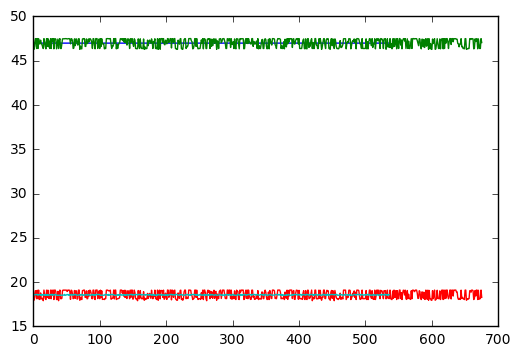

In [12]:
plot_predictedz, = plt.plot(predictedz, label='predictedz')
plot_z, = plt.plot(train_z, label='train_z')
plot_w, = plt.plot(train_w, label='train_w')
plot_predw, =plt.plot(predictedw, label='predictedw')
plt.legend(handles=[plot_predicted, plot_z,plot_w,plot_predw])

In [13]:
from mpl_toolkits.mplot3d import Axes3D